In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load Data

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Group Data based on stroke

In [5]:
grouped = df.groupby(['stroke'])
stroke = grouped.get_group(1)
no_stroke = grouped.get_group(0)
stroke.head()
no_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


Data Exploration

Age

In [25]:
print("Stroke age",stroke['age'].mean())
print("No Stroke age",no_stroke['age'].mean())

Stroke age 67.72819277108434
No Stroke age 41.971544949598844


Glucose

In [26]:
print("Stroke glucose",stroke['avg_glucose_level'].mean())
print("No Stroke glucose",no_stroke['avg_glucose_level'].mean())

Stroke glucose 132.54473895582328
No Stroke glucose 104.79551326887471


BMI

In [27]:
print("Stroke bmi",stroke['bmi'].mean())
print("No Stroke bmi",no_stroke['bmi'].mean())

Stroke bmi 30.471291866028707
No Stroke bmi 28.823063829787234


Categorical Variables

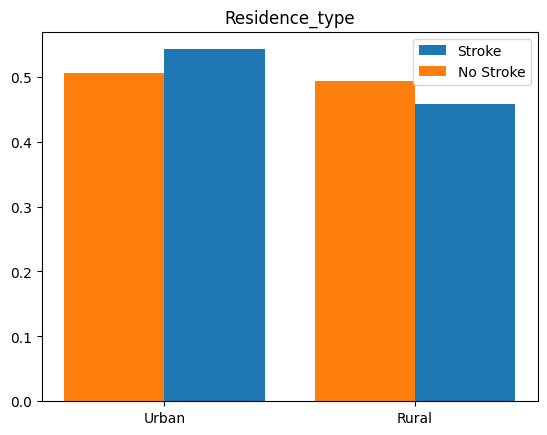

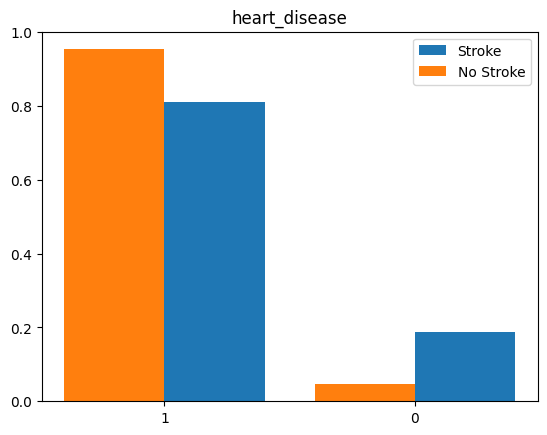

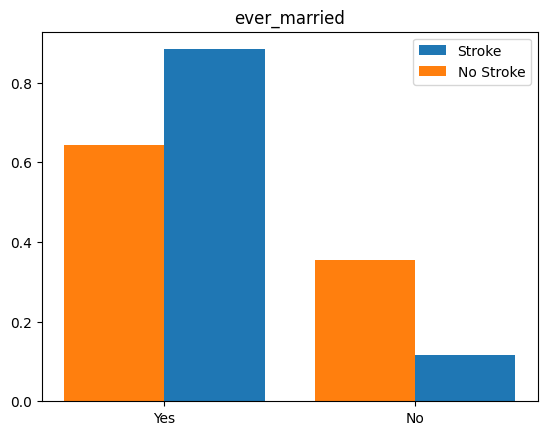

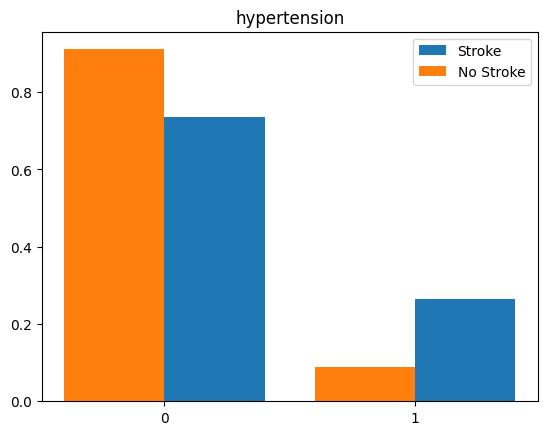

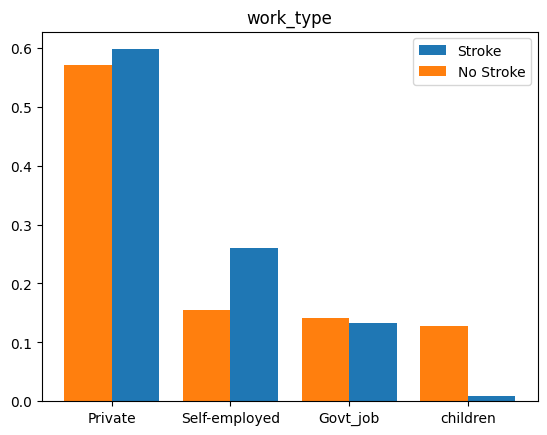

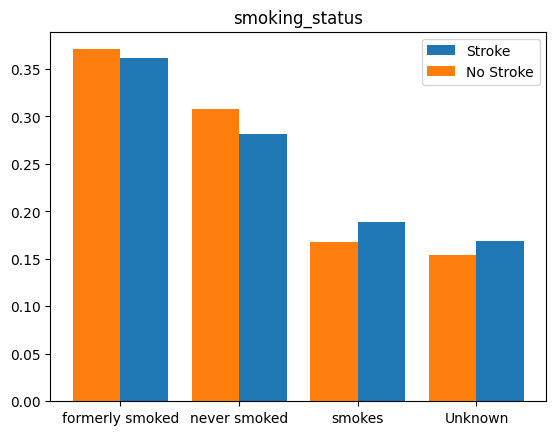

In [63]:
types = ['Residence_type', 'heart_disease', 'ever_married', 'hypertension', 'work_type', 'smoking_status']
for type in types:
    categories = stroke[type].unique()
    stroke_percentages = [stroke[type].value_counts()[i]/stroke[type].count() for i in range(len(categories))]
    no_stroke_percentages = [no_stroke[type].value_counts()[i]/no_stroke[type].count() for i in range(len(categories))]
    x_axis = np.arange(len(categories))
    plt.bar(x_axis + .2, stroke_percentages, 0.4, label="Stroke")
    plt.bar(x_axis - .2, no_stroke_percentages, 0.4, label="No Stroke")
    plt.xticks(x_axis, categories)
    plt.legend()
    plt.title(type)
    plt.show()
